# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 3 </center>

# <center>Feature Engineering</center>

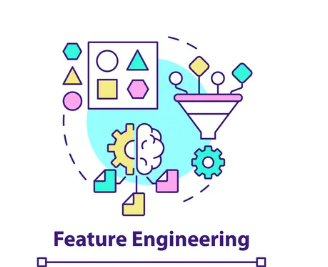

# 1. Imputing Categorical Features using sklearn

Instructions:

- Load data from loan_train.csv file. Explore to discover missing values if any.


- Use sklearn SimpleImputer to Impute the missing values with most_frequent value.



In [89]:
import pandas as pd;
result=pd.read_csv("loan_train.csv")



In [90]:
result.drop(labels="Loan_ID", axis=1,inplace=True)
result



Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

In [91]:
cvs=result.select_dtypes(include=["object"])
cvs

Gender Married Dependents     Education Self_Employed Property_Area  \
0      Male      No          0      Graduate            No         Urban   
1      Male     Yes          1      Graduate            No         Rural   
2      Male     Yes          0      Graduate           Yes         Urban   
3      Male     Yes          0  Not Graduate            No         Urban   
4      Male      No          0      Graduate            No         Urban   
..      ...     ...        ...           ...           ...           ...   
609  Female      No          0      Graduate            No         Rural   
610    Male     Yes         3+      Graduate            No         Rural   
611    Male     Yes          1      Graduate            No         Urban   
612    Male     Yes          2      Graduate            No         Urban   
613  Female      No          0      Graduate           Yes     Semiurban   

    Loan_Status  
0             Y  
1             N  
2             Y  
3             Y  
4             Y  
..          ...  
609           Y  
610           Y  
611           Y  
612           Y  
613           N  

[614 rows x 7 columns]

In [92]:
cvs.isna().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [93]:

from sklearn.impute import SimpleImputer
imputeC=SimpleImputer(strategy="most_frequent")

result1=imputeC.fit_transform(result)
result1




array([['Male', 'No', '0', ..., 1.0, 'Urban', 'Y'],
       ['Male', 'Yes', '1', ..., 1.0, 'Rural', 'N'],
       ['Male', 'Yes', '0', ..., 1.0, 'Urban', 'Y'],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 'Urban', 'Y'],
       ['Male', 'Yes', '2', ..., 1.0, 'Urban', 'Y'],
       ['Female', 'No', '0', ..., 0.0, 'Semiurban', 'N']], dtype=object)

In [94]:
result3=pd.DataFrame(result1,columns=result.columns)
result3

Gender Married Dependents     Education Self_Employed ApplicantIncome  \
0      Male      No          0      Graduate            No            5849   
1      Male     Yes          1      Graduate            No            4583   
2      Male     Yes          0      Graduate           Yes            3000   
3      Male     Yes          0  Not Graduate            No            2583   
4      Male      No          0      Graduate            No            6000   
..      ...     ...        ...           ...           ...             ...   
609  Female      No          0      Graduate            No            2900   
610    Male     Yes         3+      Graduate            No            4106   
611    Male     Yes          1      Graduate            No            8072   
612    Male     Yes          2      Graduate            No            7583   
613  Female      No          0      Graduate           Yes            4583   

    CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History  \
0                 0.0      120.0            360.0            1.0   
1              1508.0      128.0            360.0            1.0   
2                 0.0       66.0            360.0            1.0   
3              2358.0      120.0            360.0            1.0   
4                 0.0      141.0            360.0            1.0   
..                ...        ...              ...            ...   
609               0.0       71.0            360.0            1.0   
610               0.0       40.0            180.0            1.0   
611             240.0      253.0            360.0            1.0   
612               0.0      187.0            360.0            1.0   
613               0.0      133.0            360.0            0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

# 2. Encoding Categorical Features

### 2.1. Encoding Nominal Features

Instructions:

- Explore data and discover nominal features.


- Use one-hot encoding technique to encode nominal features.

In [106]:
from sklearn.preprocessing import OneHotEncoder;
ohe=OneHotEncoder();
result4=ohe.fit_transform(result3[["Gender","Married","Self_Employed"]]).toarray()
result4


array([[0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [107]:

result5=pd.DataFrame(result4,columns=ohe.get_feature_names_out())
result5

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
609            1.0          0.0         1.0          0.0               1.0   
610            0.0          1.0         0.0          1.0               1.0   
611            0.0          1.0         0.0          1.0               1.0   
612            0.0          1.0         0.0          1.0               1.0   
613            1.0          0.0         1.0          0.0               0.0   

     Self_Employed_Yes  
0                  0.0  
1                  0.0  
2                  1.0  
3                  0.0  
4                  0.0  
..                 ...  
609                0.0  
610                0.0  
611                0.0  
612                0.0  
613                1.0  

[614 rows x 6 columns]

### 2.2. Encoding Ordinal Features

Instructions:

- Explore data and discover all ordinal features


- Use OrdinalEncoder to encode ordinal Features

In [109]:
from sklearn.preprocessing import OrdinalEncoder
ode=OrdinalEncoder()
result6=ode.fit_transform(result3[["Education","Property_Area"]])
result6

array([[0., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [0., 2.],
       [0., 1.]])

In [110]:
result7=pd.DataFrame(result6,columns=ode.get_feature_names_out())
result7

Education  Property_Area
0          0.0            2.0
1          0.0            0.0
2          0.0            2.0
3          1.0            2.0
4          0.0            2.0
..         ...            ...
609        0.0            0.0
610        0.0            0.0
611        0.0            2.0
612        0.0            2.0
613        0.0            1.0

[614 rows x 2 columns]

In [121]:
result7=pd.concat([result5,result7])
result7

Gender_Female  Gender_Male  Married_No  Married_Yes  Self_Employed_No  \
0              0.0          1.0         1.0          0.0               1.0   
1              0.0          1.0         0.0          1.0               1.0   
2              0.0          1.0         0.0          1.0               0.0   
3              0.0          1.0         0.0          1.0               1.0   
4              0.0          1.0         1.0          0.0               1.0   
..             ...          ...         ...          ...               ...   
609            NaN          NaN         NaN          NaN               NaN   
610            NaN          NaN         NaN          NaN               NaN   
611            NaN          NaN         NaN          NaN               NaN   
612            NaN          NaN         NaN          NaN               NaN   
613            NaN          NaN         NaN          NaN               NaN   

     Self_Employed_Yes  Education  Property_Area  
0                  0.0        NaN            NaN  
1                  0.0        NaN            NaN  
2                  1.0        NaN            NaN  
3                  0.0        NaN            NaN  
4                  0.0        NaN            NaN  
..                 ...        ...            ...  
609                NaN        0.0            0.0  
610                NaN        0.0            0.0  
611                NaN        0.0            2.0  
612                NaN        0.0            2.0  
613                NaN        0.0            1.0  

[1228 rows x 8 columns]

### 2.3. Label Encoder

Instructions:

- Use LabelEncoder to encode target feature.


- Analyze the difference between Ordinal Encoder and Label Encoder

In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
result8=le.fit_transform(result3.Loan_Status)
result8


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,